In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 253s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

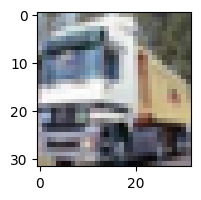

In [12]:
plt.figure(figsize = (10,2))
plt.imshow(x_train[1])

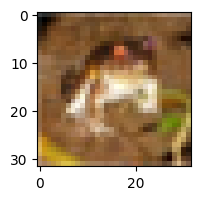

In [14]:
plt.figure(figsize = (10,2))
plt.imshow(x_train[0])

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

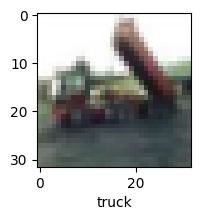

In [24]:
plot_sample(x_train,y_train, 2)

In [25]:
x_train=x_train/255
x_test= x_test/255

In [28]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer="SGD",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 46s 29ms/step - loss: 1.8143 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6248 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5435 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4848 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4335 - accuracy: 0.4958


In [29]:
ann.evaluate(x_test, y_test )

313/313 [==============================] - 3s 7ms/step - loss: 1.4868 - accuracy: 0.4643


[1.4867883920669556, 0.4643000066280365]

In [32]:
from sklearn.metrics import confusion_matrix , classification_report 
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element)for element in y_pred]
print ("classificstion Report :\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 7ms/step
classificstion Report :
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      1000
           1       0.54      0.69      0.61      1000
           2       0.40      0.26      0.32      1000
           3       0.33      0.42      0.37      1000
           4       0.58      0.18      0.27      1000
           5       0.55      0.17      0.25      1000
           6       0.37      0.77      0.50      1000
           7       0.67      0.45      0.53      1000
           8       0.45      0.77      0.57      1000
           9       0.55      0.44      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



In [36]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),  # Corrected syntax
    layers.MaxPooling2D((2, 2)),  # CNN
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),  # Corrected syntax
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [37]:
cnn.compile (optimizer= "adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [38]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 14ms/step - loss: 1.4252 - accuracy: 0.4878
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0655 - accuracy: 0.6271
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9297 - accuracy: 0.6763
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8298 - accuracy: 0.7111
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7577 - accuracy: 0.7376
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6892 - accuracy: 0.7597
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6277 - accuracy: 0.7818
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5707 - accuracy: 0.8018
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5192 - accuracy: 0.8188
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [40]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9423 - accuracy: 0.7055


[0.9422699213027954, 0.7055000066757202]

In [42]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[2.2869048e-05, 2.2941877e-05, 1.2881237e-03, 9.3005490e-01,
        4.5564389e-06, 5.9317380e-02, 9.2410119e-03, 1.2438187e-06,
        1.5945114e-05, 3.1042491e-05],
       [7.2728470e-04, 1.9271725e-01, 7.2712481e-07, 3.7744812e-08,
        3.8246412e-10, 1.4022382e-10, 7.7200651e-10, 3.5870261e-08,
        8.0633283e-01, 2.2183635e-04],
       [2.2055158e-01, 3.8843416e-02, 2.8679990e-03, 8.2619512e-04,
        1.5731478e-03, 6.1134080e-05, 1.4868670e-04, 3.8476028e-03,
        7.2429711e-01, 6.9831689e-03],
       [8.7104225e-01, 3.2836332e-03, 1.1697745e-01, 5.0059576e-03,
        1.3865306e-04, 5.0854874e-06, 5.5321422e-04, 7.6591241e-06,
        2.9783915e-03, 7.7112045e-06],
       [5.7105161e-09, 9.6365884e-06, 5.5245288e-02, 9.1563184e-03,
        1.4768203e-01, 1.5702080e-05, 7.8788829e-01, 4.1989810e-07,
        2.3414186e-06, 1.0157983e-08]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [44]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

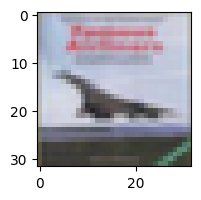

In [55]:
plot_sample(x_test, y_test,3)

In [50]:
classes[y_classes[3]]

'airplane'